# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

## Carregando as bibliotecas

In [1]:
# Carregando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

#### Carregando e visualizando a base de dados

Aqui vemos que algumas colunas não são necessárias e temos uma boa ideia de como está nossa base de dados

In [2]:
# Abrindo e visualizando a base de dados.
data = pd.read_csv('previsao_de_renda.csv')


# cópia do DataFrame sem as colunas index, mau e unnamed.
datadrop = data.drop(['index', 'mau', 'Unnamed: 0'], axis=1).copy()

datadrop.head()    

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


####  Preparação da base de dados

Aqui estou fazendo uma reamostragem da base de dados para simular que essa base tenha medidas em três meses distintos, para podermos comparar as distribuições das variáveis no tempo.

In [3]:
n_meses = 12
n_clientes = 1000

datas = pd.Series(pd.date_range('1/1/2015', periods = n_meses, freq = 'MS').repeat(n_clientes))

dados = datadrop.sample(n = n_meses * n_clientes, replace=True).reset_index()

dados2 = pd.concat([datas, dados], axis = 1)
dados2.rename({0:'data_ref'}, inplace = True, axis = 'columns')

#### Ajustando a data

Aqui estou verificando a data e vi que após a concatenação a data foi duplicada e faço o ajuste retirando as dadas duplicadas.

In [4]:
dados2['data_ref']

,data_ref,data_ref
0,2015-01-01,2015-03-01
1,2015-01-01,2015-04-01
2,2015-01-01,2015-08-01
3,2015-01-01,2015-07-01
4,2015-01-01,2015-11-01
...,...,...
11995,2015-12-01,2015-01-01
11996,2015-12-01,2015-09-01
11997,2015-12-01,2015-02-01
11998,2015-12-01,2015-07-01


In [5]:
dados2 = dados2.loc[:, ~dados2.columns.duplicated()]


# Avaliação da distribuição

Finalmente temos o gráfico. Escolhi fazer com a duração de 12 meses e duas variáveis, posse_de_imovel e posse_de_veiculo, fiz em gráfico de barras e em gráfico de barras empilhadas. Não pude observar grandes alterações nesse período de tempo.

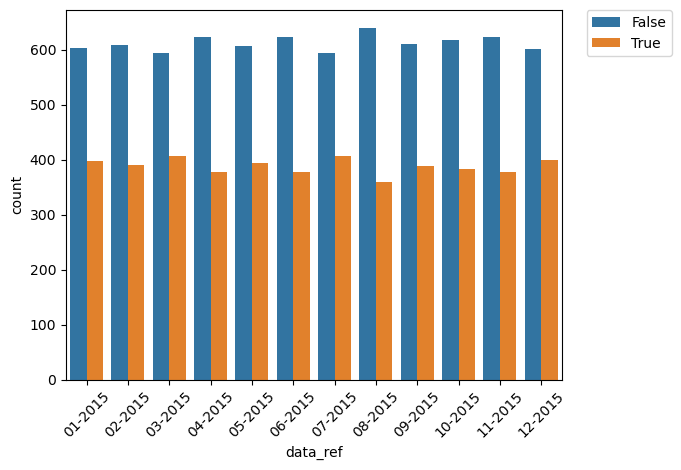

In [6]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_veiculo', data=dados2)

tick_labs = dados2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# tick_labs.tolist()

ticks = ax.set_xticks(list(range(dados2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [17]:
tab = pd.crosstab(dados2['data_ref'],dados2['posse_de_imovel'])
tab.div(tab.sum(axis = 1), axis = 0)

posse_de_imovel,False,True
data_ref,,
2015-01-01,0.334,0.666
2015-02-01,0.325,0.675
2015-03-01,0.297,0.703
2015-04-01,0.312,0.688
2015-05-01,0.314,0.686
2015-06-01,0.328,0.672
2015-07-01,0.330,0.670
2015-08-01,0.330,0.670
2015-09-01,0.323,0.677


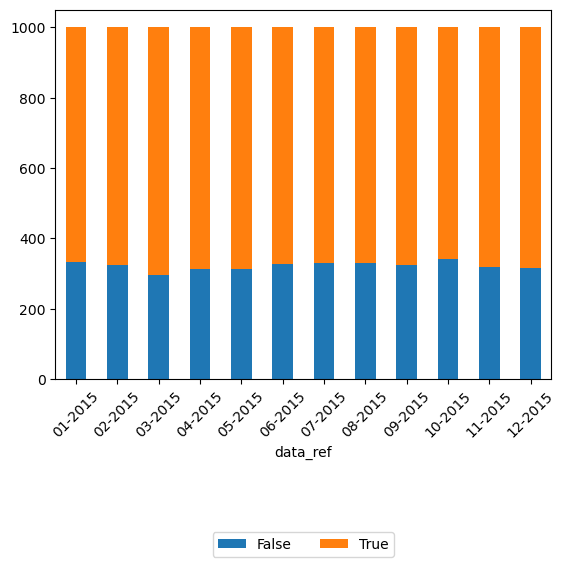

In [16]:
tab_freq = pd.crosstab(dados2['data_ref'],dados2['posse_de_imovel'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax = tab.plot.bar(stacked = True)

tick_labs = dados2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(dados2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

# Construindo Gráficos com as médias de cada nível da variável

Nesta etápa construi gráficos com as médias relacionadas de algumas variáveis no tempo. houveram algumas alterações no tempo e com certeza alguns desses dados obtidos podem ser utilizados em uma modelagem.

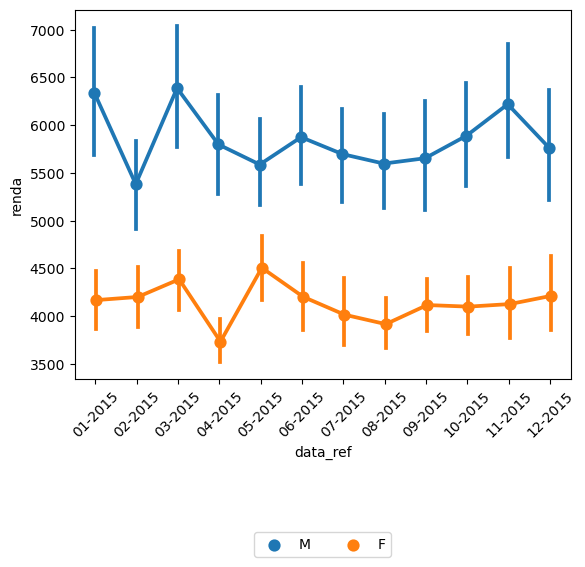

In [26]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'sexo',
                   data=dados2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = dados2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(dados2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

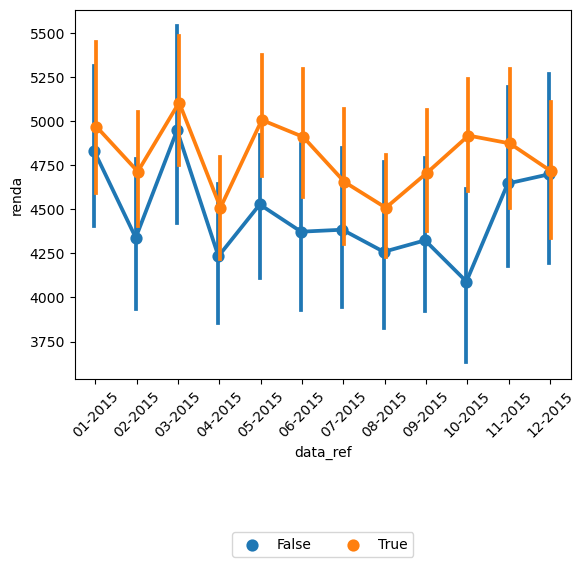

In [25]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_imovel',
                   data=dados2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = dados2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(dados2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

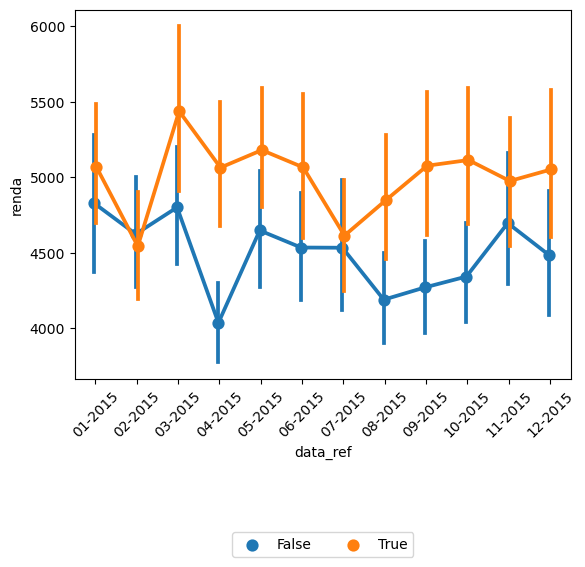

In [27]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_veiculo',
                   data=dados2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = dados2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(dados2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

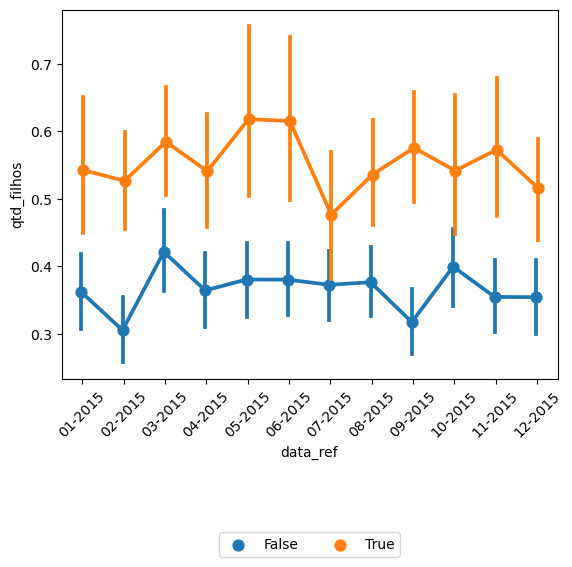

In [30]:
ax = sns.pointplot(x="data_ref", y="qtd_filhos", hue = 'posse_de_veiculo',
                   data=dados2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = dados2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(dados2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)